In [1]:
import pandas as pd
import datetime as dt

In [2]:
stk_data = pd.read_csv("Tatacoffee13_21.csv", index_col="Date")

## Standardization 

In [3]:
column="Close"

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
Ms = MinMaxScaler()

In [6]:
data1 = Ms.fit_transform(stk_data[[column]])

In [7]:
data1.shape

(2225, 1)

## Train Test Split

In [8]:
training_size = round(len(data1)*0.80)

In [9]:
print(training_size)

1780


In [10]:
x_train = data1[:training_size]

In [11]:
x_test = data1[training_size:]

In [12]:
y_train=data1[:training_size]

In [13]:
y_test = data1[training_size:]

## Model Training and Evaluation

In [14]:
from sklearn.metrics import mean_squared_error
tends = ['n','t','c','ct']
lags = [1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    for td in tends:
        model = AutoReg(x_train, lags=i,trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(len(x_train), len(data1)-1)
        from stockFunctions import rmsemape
        print(f'Lag={i}, Tend={td}')
        rmsemape(y_test,y_pred)
        print("*********************************")

Lag=1, Tend=n
RMSE-Testset: 0.058859347313836866
*********************************
Lag=1, Tend=t
RMSE-Testset: 0.0656730653670739
*********************************
Lag=1, Tend=c
RMSE-Testset: 0.043365250337633665
*********************************
Lag=1, Tend=ct
RMSE-Testset: 0.15273694386322012
*********************************
Lag=2, Tend=n
RMSE-Testset: 0.059469572437784286
*********************************
Lag=2, Tend=t
RMSE-Testset: 0.053333877982381574
*********************************
Lag=2, Tend=c
RMSE-Testset: 0.034871543649433054
*********************************
Lag=2, Tend=ct
RMSE-Testset: 0.15147077869434009
*********************************
Lag=3, Tend=n
RMSE-Testset: 0.05944295500377273
*********************************
Lag=3, Tend=t
RMSE-Testset: 0.053497989920487654
*********************************
Lag=3, Tend=c
RMSE-Testset: 0.03603799252424545
*********************************
Lag=3, Tend=ct
RMSE-Testset: 0.14723515340669033
*********************************
Lag=4, T

In [15]:
i=2
td='c'
model = AutoReg(x_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(x_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=2,Trend=c
RMSE-Testset: 0.034871543649433054
************


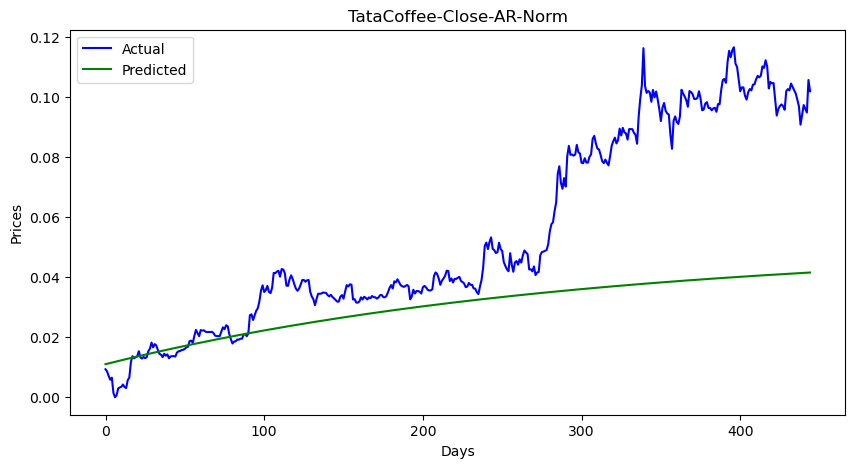

In [16]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [17]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [18]:
forecast

array([0.04156393, 0.04159358, 0.04162314, 0.0416526 ])

In [19]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [20]:
forecast_stock_price_test_oriF

,Closefore
0,115.852408
1,115.899822
2,115.947078
3,115.994175
